In [60]:
from Preprocessing.Preprocessor import main_Datagen, split_dataset, denoise_in, synthetic_data
import h5py
import numpy as np
import napari
import matplotlib.pyplot as plt
import cv2
from glob import glob
from PIL import Image
from numpy import asarray

In [2]:

dataInput = "VMP_RL1_Exp001_Img010_mix4GT.czi"
resultPath = "/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/generated_denoise"
img_w = 256
img_h = 256
img_d = 128
split = 0.2
percentile = 0.99
calc_perc = False
n_channels = 3
type_norm = "ac"
denoise = True

In [3]:


main_Datagen(dataInput,resultPath,img_w,img_h,10,138,split,calc_perc,percentile,n_channels,type_norm,denoise)


Loading img: 1/128
Loaded: 1/128


KeyboardInterrupt: 

In [3]:
split_dataset(resultPath,split)

Splitting data into training and validation... 0.2 part is validation


In [2]:
test = h5py.File("/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/generated_VMP_RL1_Exp001_Img010_mix4GT/train/epoch_125_fake_B.vox", 'r')
test1 = h5py.File("/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/generated_VMP_RL1_Exp001_Img010_mix4GT/train/epoch_125_real_B.vox", 'r')
arr = np.array(test['data'])
arr2 = np.array(test1['data'])
view = napari.view_image(arr, channel_axis = 0)
view.add_image(arr2, channel_axis = 0)
napari.run()

Column names are epoch, embeddings_loss, loss, semantic_class_loss
Column names are epoch, embeddings_loss, loss, semantic_class_loss
Column names are epoch, embeddings_loss, loss, semantic_class_loss
Column names are epoch, embeddings_loss, loss, semantic_class_loss


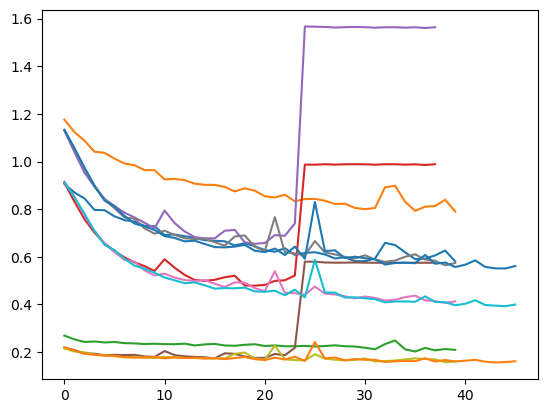

In [40]:
import csv
import matplotlib.pyplot as plt

with open('/Users/coenkenter/Downloads/training.log') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    epoch = []
    embedding_loss = []
    loss = []
    semantic_loss = []
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            epoch.append(int(row[0]))
            embedding_loss.append(float(row[1]))
            loss.append(float(row[2]))
            semantic_loss.append(float(row[3]))
            line_count += 1

    plt.plot(embedding_loss)
    plt.plot(loss)
    plt.plot(semantic_loss)


with open('/Users/coenkenter/Downloads/training-1.log') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    epoch = []
    embedding_loss = []
    loss = []
    semantic_loss = []
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            epoch.append(int(row[0]))
            embedding_loss.append(float(row[1]))
            loss.append(float(row[2]))
            semantic_loss.append(float(row[3]))
            line_count += 1

    plt.plot(embedding_loss)
    plt.plot(loss)
    plt.plot(semantic_loss)



with open('/Users/coenkenter/Downloads/training-2.log') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    epoch = []
    embedding_loss = []
    loss = []
    semantic_loss = []
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            epoch.append(int(row[0]))
            embedding_loss.append(float(row[1]))
            loss.append(float(row[2]))
            semantic_loss.append(float(row[3]))
            line_count += 1

    plt.plot(embedding_loss)
    plt.plot(loss)
    plt.plot(semantic_loss)
with open('/Users/coenkenter/Downloads/training-3.log') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    epoch = []
    embedding_loss = []
    loss = []
    semantic_loss = []
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            epoch.append(int(row[0]))
            embedding_loss.append(float(row[1]))
            loss.append(float(row[2]))
            semantic_loss.append(float(row[3]))
            line_count += 1

    plt.plot(embedding_loss)
    plt.plot(loss)
    plt.plot(semantic_loss)
    plt.show()

In [14]:
def den(inp,s,siz,v):
    out = np.zeros(inp.shape).astype('uint8')
    print(out.shape)
    print(inp.shape)
    for i in range(inp.shape[0]):
       out[i] = cv2.fastNlMeansDenoising(inp[i],None,s,siz,v)
    return out



In [17]:
test = h5py.File("/Users/coenkenter/Downloads/9_16.h5", 'r')

arr = np.array(test['mixed'])
view = napari.view_image(arr[0])
view.add_image(np.array(test['unmixed']),channel_axis=0)
synth = synthetic_data(test['unmixed'][0],test['unmixed'][1],"Max")
print(synth.shape)
view.add_image(synth)
view.add_image(synthetic_data(test['unmixed'][0],test['unmixed'][1],"50-50"))
test = h5py.File("/Users/coenkenter/Downloads/9_16-1.h5", 'r')
arr = np.array([denoise_in(x, True) for x in test['mixed'][0]])
unmx = np.array([[denoise_in(x,True) for x in test['unmixed'][0]],[denoise_in(x,True) for x in test['unmixed'][1]]])
view = napari.view_image(arr)
view.add_image(unmx,channel_axis=0)
synth = synthetic_data(unmx[0],unmx[1],"Max")
print(synth.shape)
view.add_image(synth)
view.add_image(synthetic_data(unmx[0],unmx[1],"50-50"))


napari.run()



(128, 256, 256)


In [87]:
test = h5py.File("/Users/coenkenter/downloads/result-2.h5" , 'r')
arr = np.array(test["image"])
view = napari.view_image(arr)
arr1 = np.array(test["segments"])
view.add_labels(arr1)
arr3 = np.array(test["truth"])
view.add_labels(arr3)
#arr4 = np.array(test["classes"])
#arr4[arr4<1.0]=0

#view.add_labels(arr4[0:30,0:256,0:256,0].astype(int))
#arr2 = np.array(test["embeddings"])
#view.add_image(arr2,channel_axis=3)

napari.run()

In [16]:


test = h5py.File("/Users/coenkenter/downloads/FGS_RL1_Exp001-2_Img033_100T.h5" , 'r')
arr = np.array(test["image"])
arr2 = np.array(test["segments"])

viewer = napari.view_image(arr)
viewer.add_labels(arr2)
napari.run()


In [3]:

import matplotlib.pyplot as plt
test = h5py.File("/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/256x256x4x2_P-99_Nac-1.0_NoEmpty_40/testdata2/FGS_BJ1_EXP006-1_Img005_NBL39_6color-part0x0x0.h5" , 'r')
arr = np.array(test["image"])

view = napari.view_image(arr,scale=(1,1,1))
napari.run()

#plt.hist(arr[0],bins=100)
#plt.show()

In [33]:
epochs = [0,1]
view = napari.Viewer()
for epoch in epochs:

    test = h5py.File("/Users/coenkenter/Downloads/%d_real_A.vox" % epoch, 'r')
    arr = np.array(test['data'][0])
    view.add_image(arr,scale=(4,1,1))

    test3 = h5py.File("/Users/coenkenter/Downloads/%d_fake_B.vox" % epoch, 'r')
    arr2 = np.array(test3['data'])
    view.add_image(arr2,channel_axis=0,scale=(4,1,1))

napari.run()

In [3]:
from stapl3d.preprocessing import shading


filepath = "/Users/coenkenter/Downloads/VMP_RL1_Exp001_Img008_mix5RD.czi"
channel = 0
idx = 0
print(
shading.get_image_info(filepath))

{'dtype': dtype('uint16'), 'nviews': 1, 'nchannels': 1, 'ntimepoints': 1, 'nplanes': 146, 'ncols': 3788, 'nrows': 3788, 'nstacks': 16, 'zstack_shape': [1, 1, 1, 1, 1, 1, 1, 1, 146, 1024, 1024, 1], 'tilesize': [1024, 1024], 'dims_zyxc': [146, 1024, 1024, 1], 'elsize_zyxc': [1.2099999999999997, 0.332106334980716, 0.332106334980716, 1], 'stack_offsets': array([[ 0.000e+00, -1.382e+03, -1.382e+03,  0.000e+00],
       [ 1.000e+00, -4.600e+02, -1.382e+03,  0.000e+00],
       [ 2.000e+00,  4.600e+02, -1.382e+03,  0.000e+00],
       [ 3.000e+00,  1.382e+03, -1.382e+03,  0.000e+00],
       [ 4.000e+00, -1.382e+03, -4.600e+02,  0.000e+00],
       [ 5.000e+00, -4.600e+02, -4.600e+02,  0.000e+00],
       [ 6.000e+00,  4.600e+02, -4.600e+02,  0.000e+00],
       [ 7.000e+00,  1.382e+03, -4.600e+02,  0.000e+00],
       [ 8.000e+00, -1.382e+03,  4.600e+02,  0.000e+00],
       [ 9.000e+00, -4.600e+02,  4.600e+02,  0.000e+00],
       [ 1.000e+01,  4.600e+02,  4.600e+02,  0.000e+00],
       [ 1.100e+01, 

In [8]:
tmp_channel_stacked_planes = []
for idx in range(45,100):
    data = shading.read_tiled_plane(filepath, channel, idx)
    # Stacking the 49 tiles on top of each other.
    tmp_channel_stacked_planes.append(data[0])
dat = np.array(tmp_channel_stacked_planes)
print(dat.shape)
view = napari.view_image(dat)

(55, 1024, 1024)


In [3]:
test = h5py.File("/Users/coenkenter/Downloads/3DStack_pix2pixHD.hdf5", 'r')
plns = np.empty((136,1024,1024,3))
for pln in range(136):
    arr = np.array(test["plane_%d"%pln][40])
    plns[pln] = arr
view = napari.view_image(plns, channel_axis=3,scale=(4,1,1))
napari.run()



In [66]:

test = h5py.File("/Users/coenkenter/PycharmProjects/ThesisTestingProject/Segmentation/preprocessing/Users/coenkenter/PycharmProjects/ThesisTestingProject/Segmentation/Segmentation_Output/training_out/FGS_BJ1_EXP006-1_Img005_NBL39_6color-part0.h5", 'r')

view = napari.view_image(test["image"])

view.add_labels(test["segments"])
napari.run()

In [46]:
import matplotlib
import os
file = "14_0-1"
data = "/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/test/"
if os.path.exists(data+ file)==False:
    os.mkdir(data+file)
datafolder =data + file

if os.path.exists(datafolder+"/mixed")==False:
    os.mkdir(datafolder+"/mixed")

if os.path.exists(datafolder+"/unmixed")==False:
    os.mkdir(datafolder+"/unmixed")
test = h5py.File(data + "/" + file + ".h5", 'r')

x = test["mixed"][0]
i=0
for i, layer in enumerate(x):
    source_image = np.zeros((layer.shape[0], layer.shape[1],3))
    layer*=255
    source_image[:,:,0] = layer
    source_image[:,:,1] = layer
    source_image[:,:,2] = layer
    matplotlib.image.imsave(datafolder+"/mixed/layer_"+str(i+1)+'.png',source_image.astype(np.uint8))


y = np.array(test["unmixed"])
for layer in range(i+1):
    source_image = np.zeros((y[0].shape[1], y[0].shape[2],3))
    source_image[:,:,0] = y[0,layer]*255
    source_image[:,:,1] = y[1,layer]*255
    matplotlib.image.imsave(datafolder+"/unmixed/layer_"+str(layer+1)+'.png',source_image.astype(np.uint8))

In [42]:
from voting import embeddings_to_labels

test = h5py.File("/Users/coenkenter/downloads/result-1.h5", 'r')
arr = np.array(test["image"])
view = napari.view_image(arr)
arr3 = np.array(test["truth"])
view.add_labels(arr3)
#arr4 = np.array(test["classes"])
#arr4[arr4<1.0]=0

#view.add_labels(arr4[0:30,0:256,0:256,0].astype(int))
#arr2 = np.array(test["embeddings"])
#view.add_image(arr2,channel_axis=3)
fg_mask = np.argmax(np.array([test["classes"]]), axis=-1)[0]
labels = embeddings_to_labels(np.array(test["embeddings"]),
                                      fg_mask,
                                      peak_min_distance=20,
                                      spacing=2,
                                      min_count=5)

view.add_labels(labels)
napari.run()



In [80]:
root = "/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/images"
z = [x.split("/") for x in
         glob(root + "/*fake.png", recursive=True)]
z = [x[len(x) - 1] for x in z]
z = [x.split("_")[1] for x in z]
z.sort(key=int)

z = ["layer_%s_fake.png"%x for x in z]

with h5py.File(f'{root}/resultImage.h5', 'w') as df:
    df.create_dataset('unmixed',
                      shape=[3, 128, 512, 512], dtype=float)
    mx = df["unmixed"]
    i = 0
    for fi in z:
        with Image.open(root+"/"+fi) as img:
            arr = asarray(img)
            mx[0,i,0:512,0:512] = arr[0:512,0:512,0]
            mx[1,i,0:512,0:512] = arr[0:512,0:512,1]
            mx[2,i,0:512,0:512] = arr[0:512,0:512,2]

        i+=1
    df.close()





In [83]:
test = h5py.File("/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/images/resultImage.h5", 'r')
arr = np.array(test["unmixed"])
view = napari.view_image(arr,channel_axis=0)
test1 = h5py.File("/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/images/0_fake_B.h5", 'r')
arr2 = np.array(test1["data"])
view.add_image(arr2, channel_axis=0)
test2 = h5py.File("/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/images/14_0-1.h5", 'r')
arr3 = np.array(test2["unmixed"])
view.add_image(arr3, channel_axis=0)
napari.run()

In [85]:
test = h5py.File("/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/images_realdata/resultImage.h5", 'r')
arr = np.array(test["unmixed"])
view = napari.view_image(arr,channel_axis=0)
test1 = h5py.File("/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/images_realdata/1_fake_B.h5", 'r')
arr2 = np.array(test1["data"])
view.add_image(arr2, channel_axis=0)
test2 = h5py.File("/Users/coenkenter/PycharmProjects/ThesisTestingProject/3DGan/data/images_realdata/1_real_A.h5", 'r')
arr3 = np.array(test2["data"])
view.add_image(arr3)
napari.run()